# Homework 5

## REST API

In [174]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

Fetch data in JSON format.

In [175]:
URI = 'http://api.nobelprize.org/2.1/nobelPrizes?limit=125&nobelPrizeYear=1901&yearTo=2024&nobelPrizeCategory=phy&format=json'
response = requests.get(URI)

nobel_data = response.json()

How to extract the motivation in english.

In [176]:
#nobel_data['nobelPrizes'][0]['laureates'][0]['motivation']['en']

Extract all the prize motivations from the JSON-list.

In [177]:
motivations = ''

for year in range(len(nobel_data['nobelPrizes'])):
    if 'laureates' in nobel_data['nobelPrizes'][year]:
         motivations += nobel_data['nobelPrizes'][year]['laureates'][0]['motivation']['en'] + ' '

We replace the word X-ray to xray, otherwise this will be considered as two words in the wordcloud.

In [178]:
new_motivations = motivations.replace('X-ray', 'xray')

Make the wordcloud.

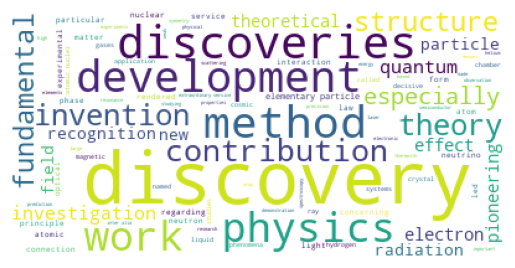

In [179]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color ='white', stopwords = stopwords).generate(new_motivations)

plt.axis('off')
plt.imshow(wordcloud)

# Web scraping

In [180]:
from bs4 import BeautifulSoup 

We creat a web scaper so we later can generate the wanted table.

In [181]:
titles = []
stars = []
prices = []
upcs = []

for i in range(3):
    URL = f'https://books.toscrape.com/catalogue/page-{i+1}.html'
    r = requests.get(URL) 
    html = BeautifulSoup(r.content)
    
    ol = html.find('ol')
    
    for li in ol.find_all('li'):
        URL2 = f'https://books.toscrape.com/catalogue/{li.h3.a["href"]}' #extract each book page
        r2 = requests.get(URL2)
        html2 = BeautifulSoup(r2.content)
        
        table = html2.find('table', class_ ='table table-striped') #the table
        upc = table.tr.td.text #extracts the upc in the table
        upcs.append(upc)
        
        head = html2.find('div', class_='col-sm-6 product_main')
        title = head.h1.text #extracts the title
        titles.append(title)
        
        price = head.p.text #extracts the price
        prices.append(price)
        
        star_rating = head.find('p', class_='star-rating') #finds the star-rating
        star= star_rating['class'][1] #extract the raiting
        stars.append(star)

Now we creat the table.

In [182]:
data = {'upc': upcs, 
     'title': titles,
     'price': prices,
     'rating': stars}

df = pd.DataFrame(data)
df

,upc,title,price,rating
0,a897fe39b1053632,A Light in the Attic,£51.77,Three
1,90fa61229261140a,Tipping the Velvet,£53.74,One
2,6957f44c3847a760,Soumission,£50.10,One
3,e00eb4fd7b871a48,Sharp Objects,£47.82,Four
4,4165285e1663650f,Sapiens: A Brief History of Humankind,£54.23,Five
5,f77dbf2323deb740,The Requiem Red,£22.65,One
6,2597b5a345f45e1b,The Dirty Little Secrets of Getting Your Dream...,£33.34,Four
7,e72a5dfc7e9267b2,The Coming Woman: A Novel Based on the Life of...,£17.93,Three
8,e10e1e165dc8be4a,The Boys in the Boat: Nine Americans and Their...,£22.60,Four
9,1dfe412b8ac00530,The Black Maria,£52.15,One
